## lecture 6 - Excercises

## Q1: The stock market

(This is about numba)

A Markov Chain is defined as a sequence of random variables where a parameter depends *only* on the preceding value. This is a crucial tool in statistics, widely used in science and beyond (economics for instance).

For instance, the stock market has phases of growing prices (bull), dreasing prices (bear) and recession. This would be a Markov Chain model:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Finance_Markov_chain_example_state_space.svg/400px-Finance_Markov_chain_example_state_space.svg.png)

where the numbers on the arrows indicate the probability that the next day will be in a given state.

Your task is to simulate the stock market according to this rule. Start from a random state and simulate many many  iterations. If your code is right, the fraction of days in each state should converge. 

Implement a pure-python version and a numba version, and compare speeds. 

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 3.81 µs
The starting day is: 1


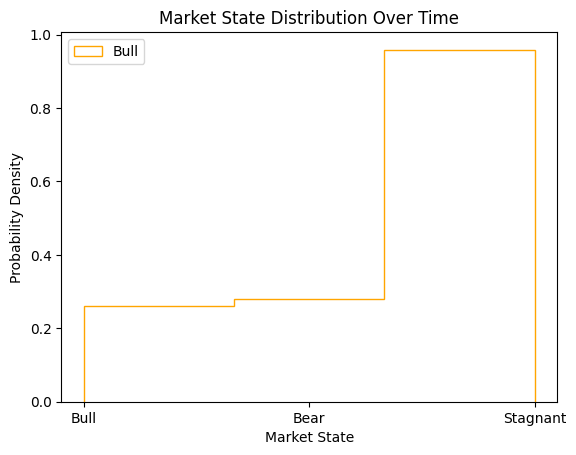

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Market states
# 0: bull, 1: bear, 2: stagnant

%time

n_days = int(1e7)  # Number of days
starting_point = list(np.random.randint(0, 3, 1))  # Random starting state
print(f'The starting day is: {starting_point[0]}')

def tomorrow(today0, N):
    today = [today0[0]]
    for i in range(N):
        current_state = today[i]
        p = np.random.rand() * 100  # Random probability between 0 and 100

        if current_state == 0:  # Bull market
            if p < 2.5:
                today.append(0)  # Remain bull
            elif p <= 7.5:
                today.append(1)  # Transition to bear
            else:
                today.append(2)  # Transition to stagnant

        elif current_state == 1:  # Bear market
            if p < 5:
                today.append(0)  # Transition to bull
            elif p <= 15:
                today.append(1)  # Remain bear
            else:
                today.append(2)  # Transition to stagnant

        else:  # Stagnant market
            if p < 25:
                today.append(0)  # Transition to bull
            elif p <= 50:
                today.append(1)  # Transition to bear
            else:
                today.append(2)  # Remain stagnant

    return today

the_days = tomorrow(starting_point, n_days)

# Plot histogram
plt.hist(the_days, bins=3, density=True, histtype='step', color='orange', label=['Bull', 'Bear', 'Stagnant'])
plt.xticks([0, 1, 2], ['Bull', 'Bear', 'Stagnant'])
plt.xlabel('Market State')
plt.ylabel('Probability Density')
plt.title('Market State Distribution Over Time')
plt.legend()
plt.show()


CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 5.25 µs


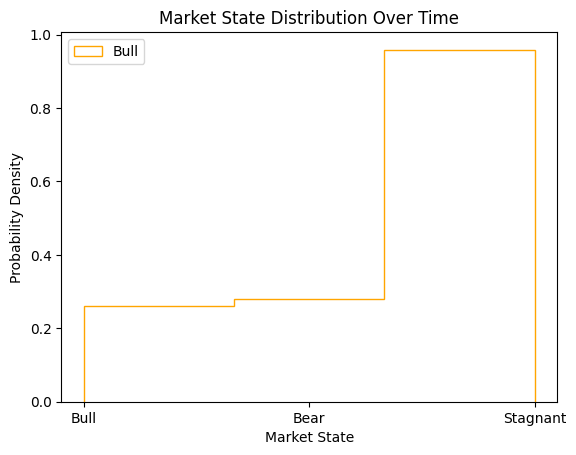

In [13]:
from numba import njit

%time

today_speedy = njit(tomorrow) # This is equivalent to decorating with @
the_days_numba = today_speedy(starting_point,n_days)

# Plot histogram
plt.hist(the_days_numba, bins=3, density=True, histtype='step', color='orange', label=['Bull', 'Bear', 'Stagnant'])
plt.xticks([0, 1, 2], ['Bull', 'Bear', 'Stagnant'])
plt.xlabel('Market State')
plt.ylabel('Probability Density')
plt.title('Market State Distribution Over Time')
plt.legend()
plt.show()

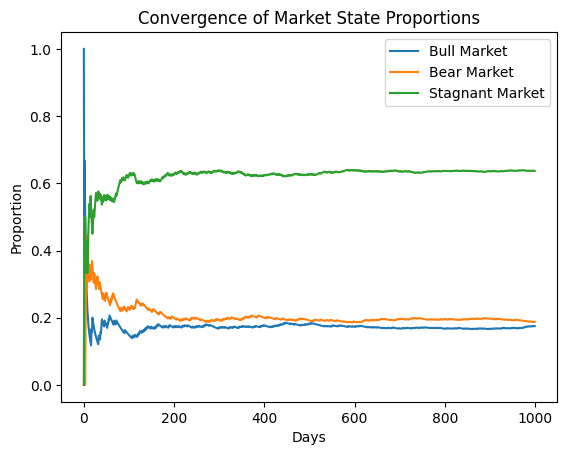

In [7]:
# ensure convegrence 
bull_proportion = [sum(np.array(the_days[:i]) == 0) / i for i in range(1, len(the_days))]
bear_proportion = [sum(np.array(the_days[:i]) == 1) / i for i in range(1, len(the_days))]
stagnant_proportion = [sum(np.array(the_days[:i]) == 2) / i for i in range(1, len(the_days))]

plt.plot(bull_proportion, label="Bull Market")
plt.plot(bear_proportion, label="Bear Market")
plt.plot(stagnant_proportion, label="Stagnant Market")
plt.xlabel("Days")
plt.ylabel("Proportion")
plt.title("Convergence of Market State Proportions")
plt.legend()
plt.show()



## Q2: Consistent plotting

(This is about python's dectorators)

Write a decorator for the plots of all your papers. 

- Remember a decorator takes a function. 
- This function in turn should return a matplotlib figure object.
- Before the function is called, the decorator should initialize a matplotlib figure with the options that you like the most (fontsize, ticks, etc etc)
- After the figure it's done, the decorator should save it to pdf.

This is a great hack for your papers! You do this once and for all, and all plots in your paper will be beautifull, all with the same style/fontsize/etc. All you'll need to do is adding `@myplot` to the relevant plotting functions. 
    
The decorator that I use for my papers is available in my python module [skywalker](https://github.com/dgerosa/skywalker).  

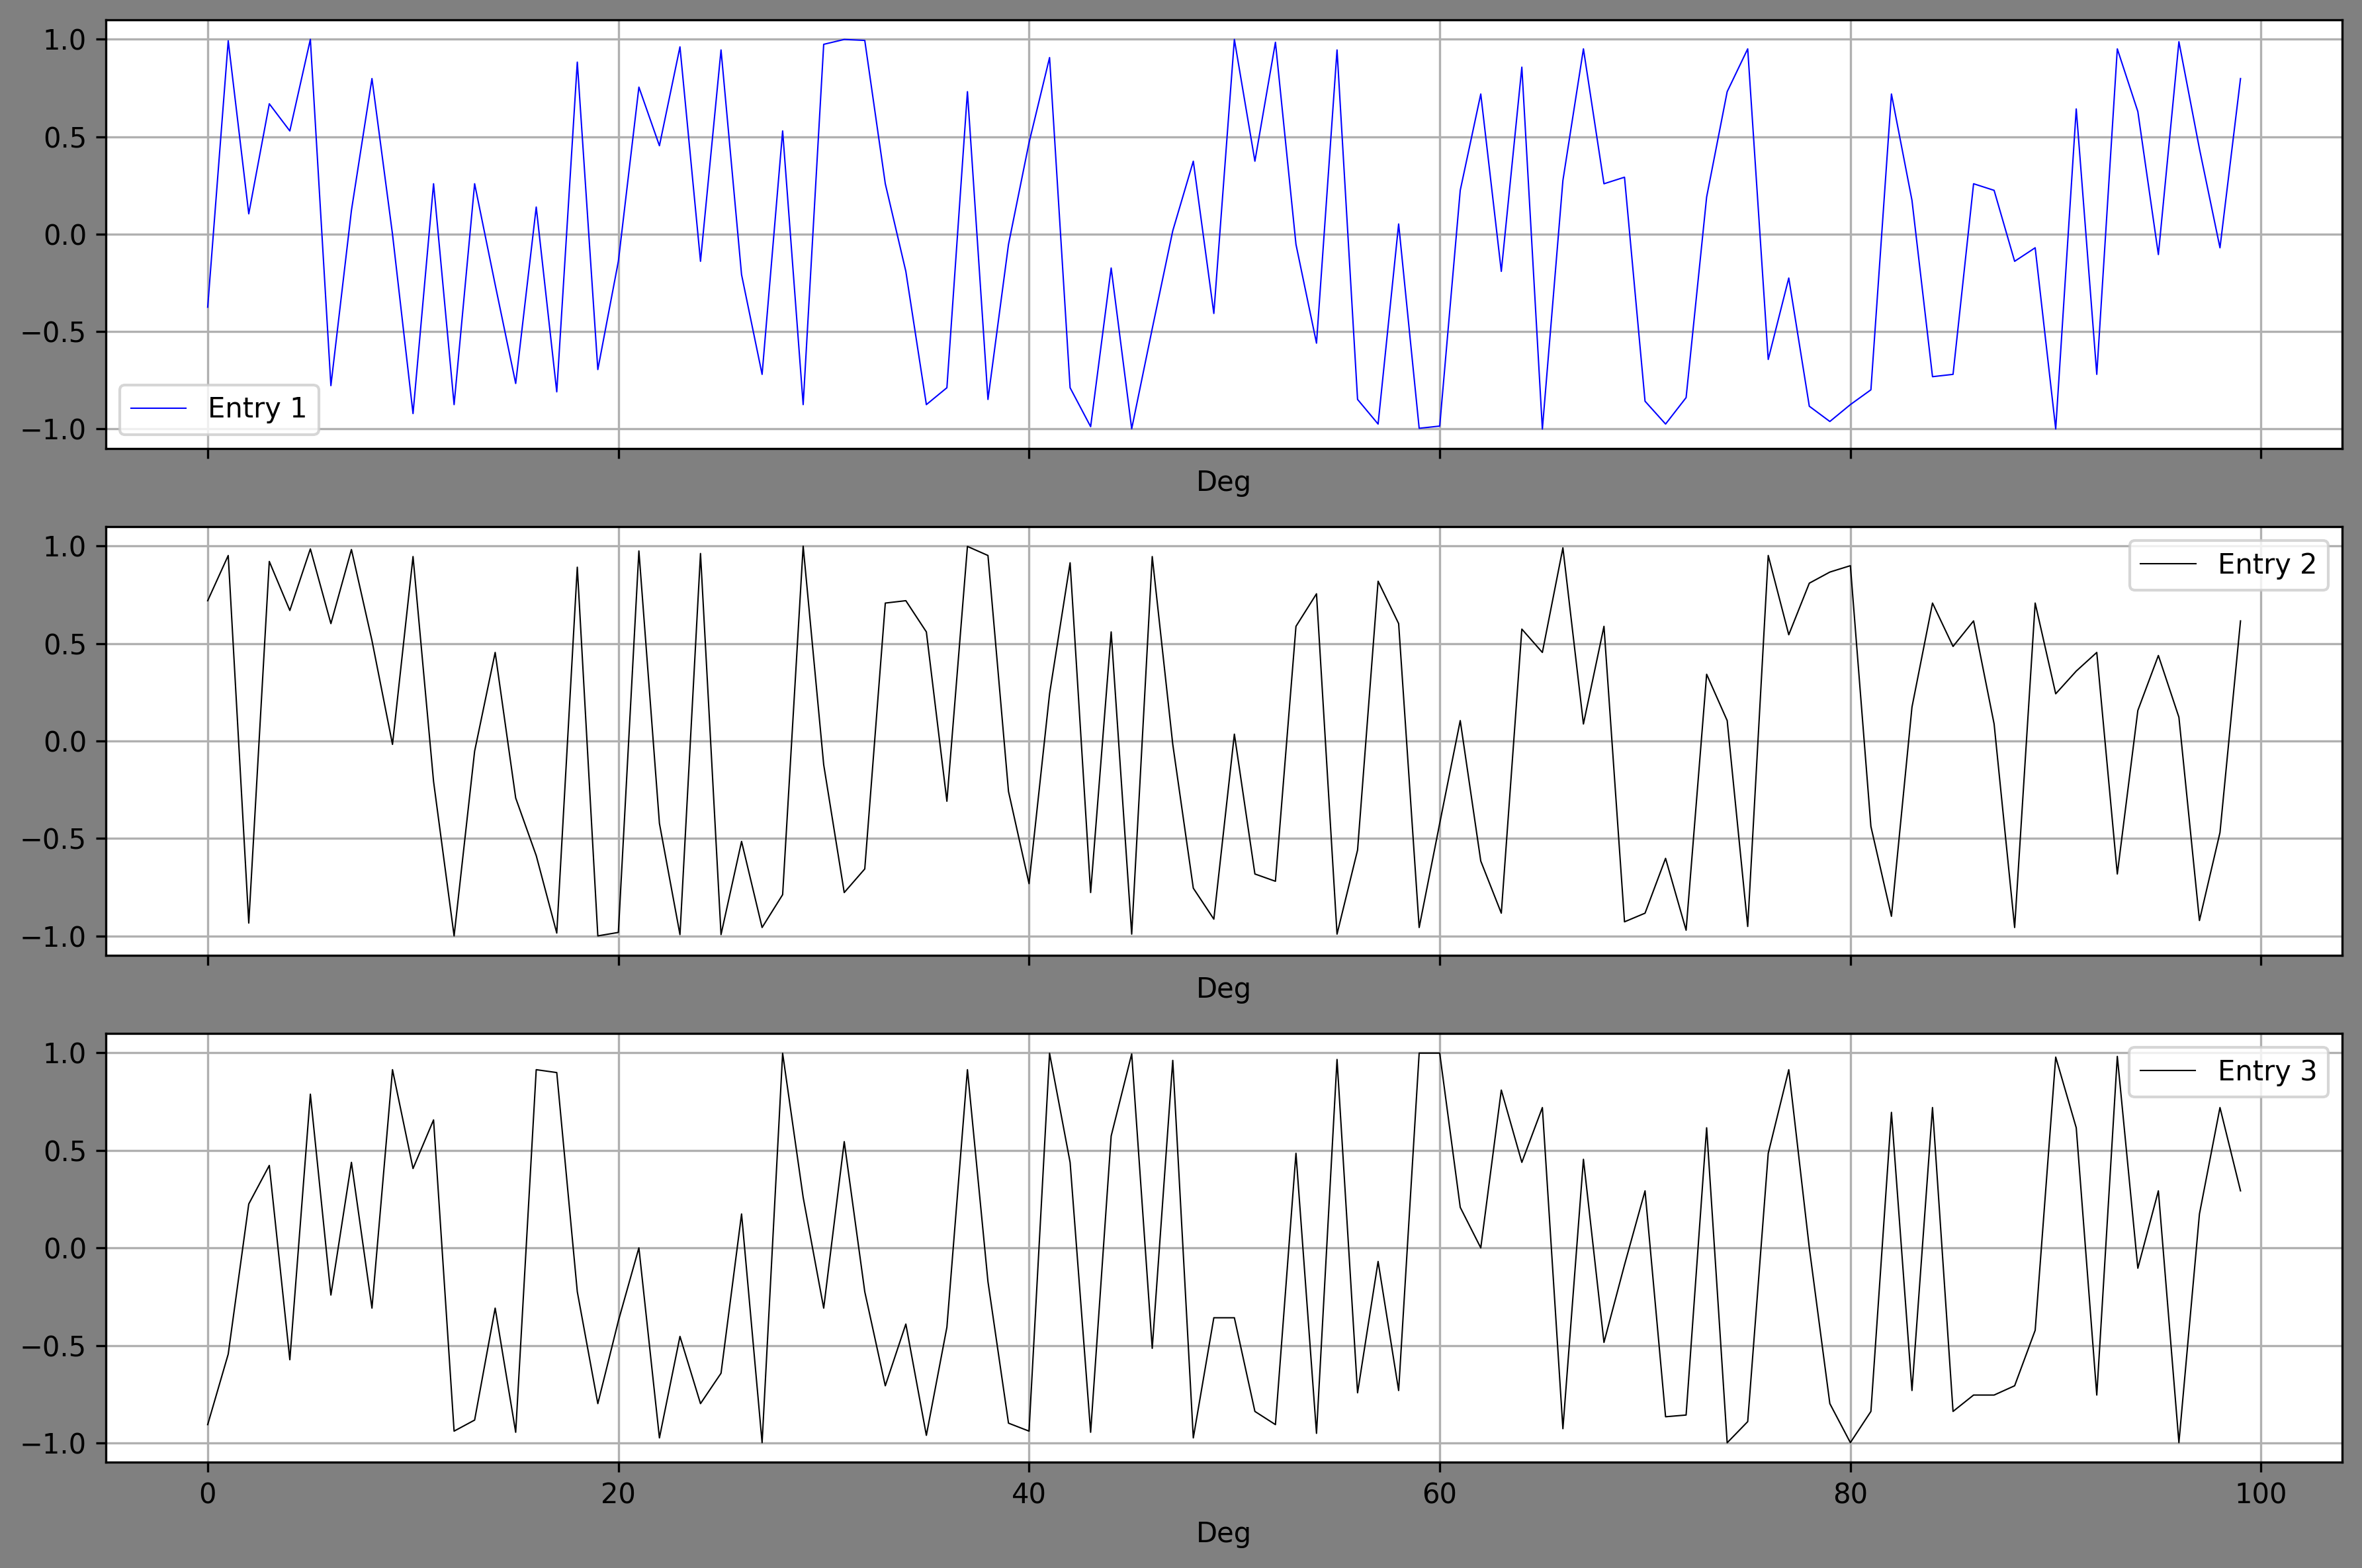

In [8]:

def subplots(func):
    def testplot_wrapper():
        fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True, dpi=300, facecolor='gray')
        for ax in axes:
            ax.grid()  # Add gridlines
            ax.set_xlabel('Deg')
        func(axes)  # Pass the axes to the wrapped function
        plt.tight_layout()
        plt.savefig('test.pdf')
    return testplot_wrapper

@subplots
def testplot(axes):
    f_x = np.sin(np.radians(np.random.randint(0, 360, 300))).reshape(100, 3)
    
    axes[0].plot(f_x[:, 0], color='b', linewidth=0.5, label='Entry 1')
    axes[1].plot(f_x[:, 1], color='black', linewidth=0.5, label='Entry 2')
    axes[2].plot(f_x[:, 2], color='black', linewidth=0.5, label='Entry 3')

    axes[0].legend(loc=0)
    axes[1].legend(loc=0)
    axes[2].legend(loc=0)
    

# Call the decorated function
testplot()
plt.show()
